# Test Bright Data SERP

## Environments

```sh
pip install python-dotenv
```

## Codes

### Imports

In [23]:
import os
import requests
import re
from pprint import pprint as pp
import json

from dotenv import load_dotenv
load_dotenv()

query = "elon+musk"
query_encoded = re.sub(r"\s+", "+", query)

target_url = f"https://www.google.com/search?q={query_encoded}&brd_json=1"

### Prepare the Query

In [15]:
query = "elon+musk"
query_encoded = re.sub(r"\s+", "+", query)
print(f"Encoded query: {query_encoded}")

BRIGHT_DATA_API_KEY = os.getenv("BRIGHT_DATA_API_KEY")
if BRIGHT_DATA_API_KEY == None:
  raise Exception("Bright Data API key is not set")
print(f"Bright Data API key: *******************************")

BRIGHT_DATA_ZONE_USERNAME_SERP = os.getenv("BRIGHT_DATA_ZONE_USERNAME_SERP")
if BRIGHT_DATA_ZONE_USERNAME_SERP == None:
  raise Exception("Bright Data SERP zone username is not set")
print(f"Bright Data SERP zone username: *******************************")

BRIGHT_DATA_ZONE_PASSWORD_SERP = os.getenv("BRIGHT_DATA_ZONE_PASSWORD_SERP")
if BRIGHT_DATA_ZONE_PASSWORD_SERP == None:
  raise Exception("Bright Data SERP zone password is not set")
print(f"Bright Data SERP zone password: *******************************")

Encoded query: elon+musk
Bright Data API key: *******************************
Bright Data SERP zone username: *******************************
Bright Data SERP zone password: *******************************


### Direct API Access

{'general': {'basic_view': False,
             'language': 'en',
             'location': 'United States',
             'mobile': False,
             'page_title': 'elon musk - Google Search',
             'query': 'elon musk',
             'results_cnt': 723000000,
             'search_engine': 'google',
             'search_time': 0.5,
             'search_type': 'text',
             'timestamp': '2025-06-06T19:33:16.401Z'},
 'input': {'original_url': 'https://www.google.com/search?q=elon+musk&brd_json=1',
           'request_id': 'hl_44639d49_1rcbpvwdsk7j'},
 'knowledge': {'description': 'Elon Reeve Musk is a businessman known for his '
                              'leadership of Tesla, SpaceX, X and DOGE. Musk '
                              'has been considered the wealthiest person in '
                              'the world since 2021; as of May 2025, Forbes '
                              'estimates his net worth to be US$424.7 billion. '
                              'Born 
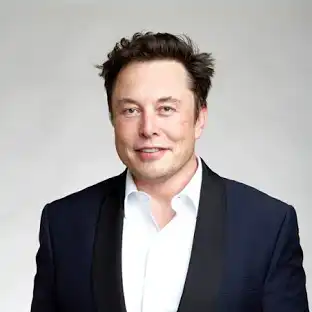
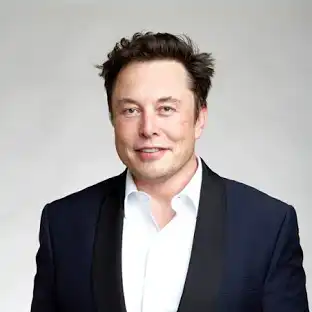
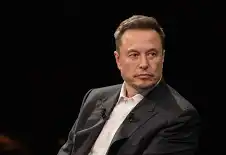
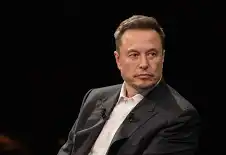
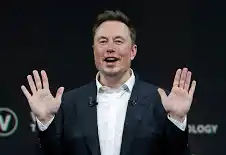
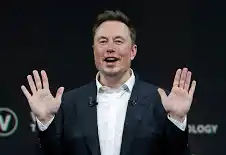
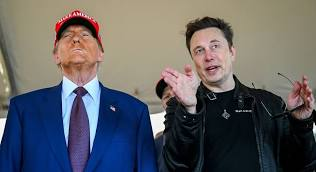
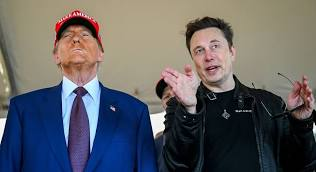
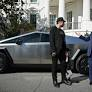
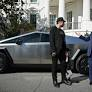
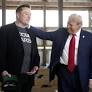
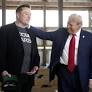
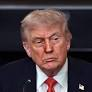
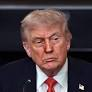
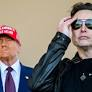
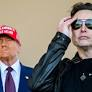
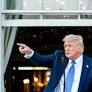
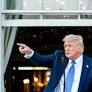
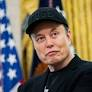
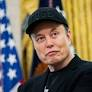

In [25]:
target_url = f"https://www.google.com/search?q={query_encoded}&brd_json=1"

url = "https://api.brightdata.com/request"

headers = {
    "Authorization": f"Bearer {BRIGHT_DATA_API_KEY}",
    "Content-Type": "application/json"
}

data = {
  "zone": "serp_1",
  "url": target_url,
  "format": "json"
}

response = requests.post(url, headers=headers, json=data)
body = response.json()['body']
pp(json.loads(body))

### Native Proxy-Based Access

/Users/lu/miniconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'brd.superproxy.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'general': {'basic_view': False,
             'language': 'en',
             'location': 'United States',
             'mobile': False,
             'page_title': 'elon musk - Google Search',
             'query': 'elon musk',
             'results_cnt': 747000000,
             'search_engine': 'google',
             'search_time': 0.43,
             'search_type': 'text',
             'timestamp': '2025-06-06T19:24:54.886Z'},
 'input': {'original_url': 'https://www.google.com/search?q=elon+musk&brd_json=1',
           'request_id': 'hl_44639d49_udlukgjcaak',
           'user_agent': 'python-requests/2.32.3'},
 'knowledge': {'description': 'Elon Reeve Musk is a businessman known for his '
                              'leadership of Tesla, SpaceX, X and DOGE. Musk '
                              'has been considered the wealthiest person in '
                              'the world since 2021; as of May 2025, Forbes '
                              'estimates his net worth to be US$42
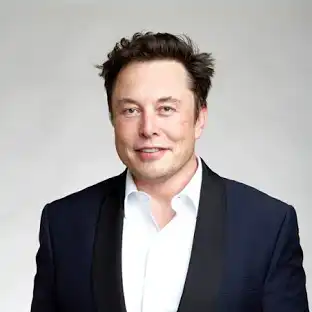
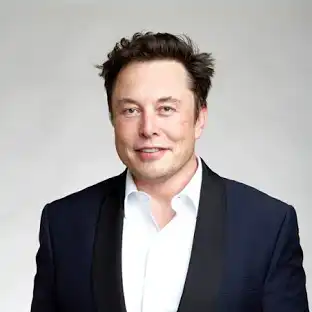
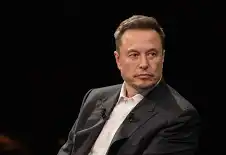
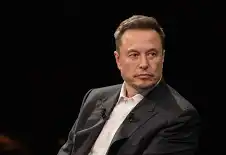
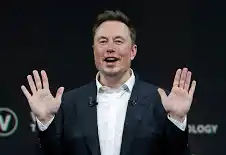
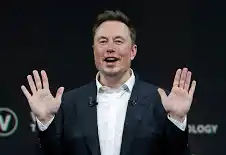
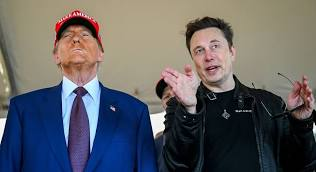
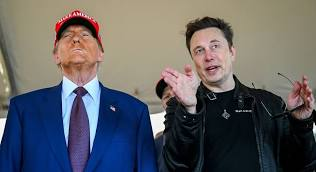
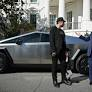
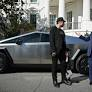
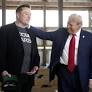
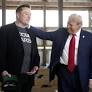
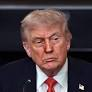
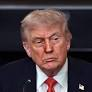
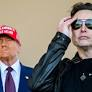
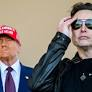
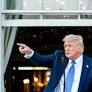
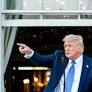
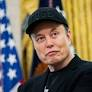
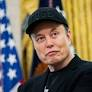

In [16]:
host = "brd.superproxy.io"
port = 33335

proxy_url = f'http://{BRIGHT_DATA_ZONE_USERNAME_SERP}:{BRIGHT_DATA_ZONE_PASSWORD_SERP}@{host}:{port}'

proxies = {
    'http': proxy_url,
    'https': proxy_url
}

url = f"https://www.google.com/search?q={query_encoded}&brd_json=1"

response = requests.get(url, proxies=proxies, verify=False)
pp(response.json())